<a href="https://colab.research.google.com/github/DarkWorldCoder/LearningAI/blob/master/AI%5B4%5DTensorFlow%5B0%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using **GPUs**

In [ ]:


!nvidia-smi

In [ ]:
import tensorflow as tf

tf.config.list_physical_devices()

# Introduction to regression with network in Tensorflow

Thera are many defiantions for a aregression but in our case we are going to simplify it: Prediction of a anumerical variable based ob sone other combination of variables even shorter

In [ ]:
tf

# Creating data to view and fit


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-3.,0,5,10,15])
y = np.array([7.,10,15,20,25])

plt.scatter(X,y)

In [ ]:
y == X + 10

# Input and output

In [ ]:
# Creatig a demot tensor for our housing price

house_info = tf.constant(["badroom","bathroom","garage"])

house_price = tf.constant([2332323])
house_info,house_price

In [ ]:
input_shape = X.shape
output_shape = y.shape


In [ ]:
#  turn numpy array into tensor

X = tf.constant(X)
y = tf.constant(y)
X,y

# steps in modeling with tensorflow 

* Crate a model- define the inout and output layers as well as the hidden layer of a deep learning model 
* Compoling the model define the loss function ( in other wordts the function which tells our moderlhwo wring it is) and the optimizer ( tells model how to imporve the patterns its learning) and evaution merics (what we can use to interpret the performance of our mdoel)
* Fitting a mdoel - letting the model try to find patterns between X & aY ( feature and label)
 
 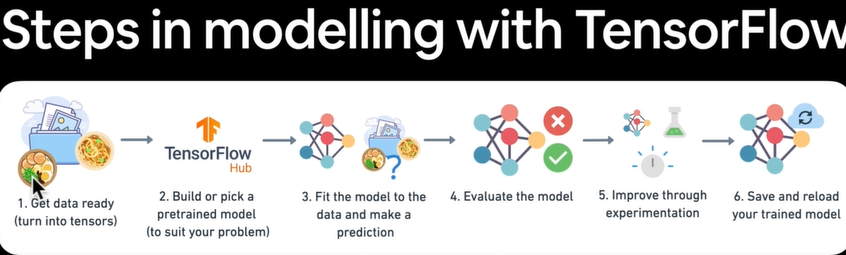


In [ ]:
# steps in modeling with tensorflow 

# set random seet

tf.random.set_seed(42)
# Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=(1,))
])

# Compile the model

model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(), #sgd is short form
              metrics=["mae"]
              )

# fit the model

model.fit(X,y,epochs=5)





In [ ]:
model.predict([25.])

# iMPROVING MODEL

We can improve our model by altering the steps we took to create a model,
 

1.   **Creating a model**  - here we might add more layers,increase the number of hidden units(all called neurons) within each of the hidden layers, change the activation function of each layer.
2.   **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a model** - here we might fit a mdoel for more epochs (leave it traning for longer) or on more data(give the model more examples to learn from )





In [ ]:
#  Rebuildig the model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=(1,))
])

model.compile(loss= tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
              )
model.fit(X,y,epochs=100)

In [ ]:
# Remind ourselvers of the data
X,y

In [ ]:
model.predict([8.])

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4440,activation="relu",input_shape=(1,)),
    # tf.keras.layers.Dense(100,activation="relu",input_shape=(1,)),
    # tf.keras.layers.Dense(100,activation="relu",input_shape=(1,)),
    tf.keras.layers.Dense(1,input_shape=(1,))
])

model.compile(loss=tf.keras.losses.mae,
              optimizer =tf.keras.optimizers.Adam(lr=0.1),
              metrics=["mae"]
              )

model.fit(X,y,epochs=400)

In [ ]:
model.predict([91.])

# Evaluating model

In [ ]:
 # Make a bigger dataset

 X = tf.range(-100,500,4)
 len(X)

In [ ]:
 y = X + 10

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

### Three sets
* Training set - the model learn from

*Validation set - the model gets tuned on this data which is typically 10-15%

*Test set - the model get evaluated on this data to test what is 


In [ ]:

# Check the length of how mant samples we have 

# split the data into train and test sets
X_train = X[:100]
Y_train = y[:100]

X_test = X[100:]
Y_test = y[100:]
 
len(X_test),len(X_train)


# Visualing the datamMM
Now out data in traning and test sets

In [ ]:
plt.figure(figsize=(10,7))

plt.scatter(X_train,Y_train,c="b",label="Training data")
plt.scatter(X_test,Y_test,c="g",label="Testing data")

# Show a legent
plt.legend()

In [ ]:
#Lets build a neural network

model= tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1,input_shape=(1,))
    ]
)

model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["mae"]
              )

# ?fit the model
model.fit(X_train,Y_train,epochs=100)

# Visualizing data



In [ ]:
# Lets create a mdoel which build sdautomatically

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation="relu",input_shape=[1]),
    # tf.keras.layers.Dense(1000,activation="sigmoid",input_shape=[1]),
    # tf.keras.layers.Dense(1000,activation="relu",input_shape=[1]),
    # tf.keras.layers.Dense(1000,activation="sigmoid",input_sh/

])

model.compile(loss=tf.keras.losses.mae,
              optimizer =tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=["mae"]
              )
model.fit(X_train,Y_train,epochs=100)

* Total Params - total numbers of parameters in the model 

* Trainable parameters - these are the parameters(pattern) the model can update as it trains

* Non - trainable params - these parameters aren't update during training(this is typical when you 
bring in already learn patterns or parameters from other models during **transfer learning**)

#Creating own Dense Layer

In [ ]:
class DenseLayer(tf.keras.layers.Layer):
  def __init__(self,input_dim,output_dim):
    super(DenseLayer,self).__init__()
    self.w = self.add_weight([input_dim,output_dim])
    self.b = self.add_weight([1,output_dim])

    def call(self,inputs):
      x = tf.matmul(inputs,self.w) + self.b
      output = tf.math.sigmoid(x)
      return output 


#Visualizing our models prediction

In [ ]:
#Make some prediction

y_pred = model.predict(X_test)
y_pred.shape

In [ ]:
Y_test.shape


In [ ]:
# Lets creat a plotting function

def plot_prediction(train_data=X_train,
                    train_labels= Y_train,
                    test_data=X_test,
                    test_labels=Y_test,
                    predictions = y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="b",label="Training data")
  plt.scatter(test_data,test_labels,c="g",label="Testing data")
  plt.scatter(test_data,predictions,c="r",label="Predictions")
  plt.legend()

In [ ]:
plot_prediction()

### Evaluting our models predictions with regression evaluation metrics

Depending on the probel you're working on , there will be differenct evaluation metrics to evalurate your model's performance



SInce we're working in a regression, two fo the main metrics:

* MAE - mean absolute error, "on average how wrong is each of my models prediction"

* MSE - mean square error, "Square the average errors"


In [ ]:
#  Calculate the mean absolute error

tf.metrics.mean_absolute_error(y_true=Y_test,y_pred=y_pred)

In [ ]:
# Calculate the mean absolute error

mea = tf.metrics.mean_absolute_error(y_true=Y_test,y_pred=tf.squeeze(y_pred))
mea

In [ ]:
# mean square error
mse = tf.metrics.mean_squared_error(y_true= Y_test,y_pred=tf.squeeze(y_pred))
mse

In [ ]:
# Make some function to reuse MAE and MSE

def mae(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,y_pred=tf.squeeze(y_pred))

def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,y_pred=tf.squeeze(y_pred))

# Resehaping the model with new praticing idea

In [ ]:
# Creating random seed
tf.random.set_seed(42)

# Create the model

model_1= tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=(1,))
])
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"]
                )
model_1.fit(X_train,Y_train,epochs=100)

In [ ]:
# Make and plot predictions for model 1

y_pred_1 = model_1.predict(X_test)
plot_prediction(predictions=y_pred_1)

In [ ]:
# Calculate model_1 evaluation metrics

mae_1 = mae(Y_test,y_pred_1)
mse_1 = mse(Y_test,y_pred_1)
mae_1,mse_1

In [ ]:
# Build a model 2

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=(1,)),
    tf.keras.layers.Dense(1,input_shape=(1,))

])
model_2.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
                metrics = ["mae"]
                )

model_2.fit(X_train,Y_train,epochs=500)

In [ ]:
X_test.shape
model_2.summary(
)
pred_2 = model_2.predict(X_test)
# pred_2.shape
plot_prediction(predictions=pred_2) 

In [ ]:
# Calculate model_3 evaluation

mae_2 = mae(Y_test,pred_2)
mse_2 = mse(Y_test,pred_2)
mae_2,mse_2

In [ ]:
# Model 3 predictions

tf.random.set_seed(42)

# Create a model

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=(1,)),
    tf.keras.layers.Dense(1,input_shape=(1,))
])

# Model 3 compile

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"]
                )
# fit the model
model_3.fit(X_train,Y_train,epochs=1000)

In [ ]:
y_pred_3 = model_3.predict(X_test)
plot_prediction(predictions=y_pred_3)

mae_3 = mae(Y_test,y_pred_3)
mse_3 = mse(Y_test,y_pred_3)

#Comparing the result of experiments

In [ ]:
# Lets compare our models results using a pandas Dataframe

import pandas as pd
model_results = [[
    "model_1",mae_1.numpy(),mse_1.numpy()
],
[
    "model_2",mae_2.numpy(),mse_2.numpy()
],
[
    "model_3",mae_3.numpy(),mse_3.numpy()
]
]

all_results = pd.DataFrame(model_results,columns=["model","mae","mse"])
all_results

# Saving model 

In [ ]:
# Save model using the save model format

model_2.save("best_model_saved_model")

In [ ]:
loaded_saved_model = tf.keras.models.load_model("best_model_saved_model")
loaded_saved_model.summary()

#Using data from csv 

In [ ]:
!pip install pandas --upgrade
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [ ]:
insurance  = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

In [ ]:
insurance_one_hot = pd.get_dummies(insurance,dtype=np.int64)
insurance_one_hot.head()

In [ ]:
#  Create x and y values (features and label)

X = insurance_one_hot.drop("charges",axis=1)
y = insurance_one_hot["charges"]

In [ ]:
# View x
X.head()

In [ ]:
y.head()

In [ ]:
# Creating and training and test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train["children"]


In [ ]:
tf.random.set_seed(42)

# Create a model

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
insurance_model.compile(loss= tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"]
                        )
# Fit the model
insurance_model.fit(X_train,y_train,epochs=100)

In [ ]:
# check the results
insurance_model.evaluate(X_test,y_test)

#Optimizing the model
 To try improve our model, we'll run 2 exp

 1> Add an extra layer with more hidden units
 2> Train for longer


In [ ]:
tf.random.set_seed(42)

# Creeate the model

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the mdoel
insurance_model_2.compile(loss=tf.keras.losses.mae,
                           optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                           metrics="mae"
                           )
insurance_model_2.fit(X_train,y_train,epochs=100,verbose=0)


In [ ]:
# Evaluate 
insurance_model_2.evaluate(X_test,y_test)

In [ ]:
# Set random seed

tf.random.set_seed(42)

# Create the mdoel

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1000),
     tf.keras.layers.Dense(100),
      tf.keras.layers.Dense(1),
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
                          metrics="mae"
)

insurance_model_3.fit(X_train,y_train,epochs=1000)

# Preprocessing data

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf


insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

Borrowing few calss from skitlearn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

ct = make_column_transformer((MinMaxScaler()
                 ,["age","bmi","children"]),
                 (OneHotEncoder(handle_unknown="ignore"),
                  ["sex","smoker","region"]
                  )
              )
# Create X and Y 

X = insurance.drop("charges",axis=1)
y = insurance["charges"]

# Build our trai and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Fit the column transform to our training data

ct.fit(X_train)

# Transofrm training and test data
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [ ]:
# wHAT DOES OUR DATA LOOK LIKE?

X_train.loc[0]

In [ ]:
X_train_normal[0]

In [ ]:
X_train.shape, X_train_normal.shape

Beautiful! our data has been normalized

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1000),
     tf.keras.layers.Dense(100),
      tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae
              ,optimizer= tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics = "mae"
              )

# fit the model

model.fit(X_train_normal,y_train,epochs=1000)

In [ ]:
# Evaluate our insurance model
model.evaluate(X_test_normal,y_test)